In [1]:
import numpy as np 
import matplotlib.pyplot as plt 


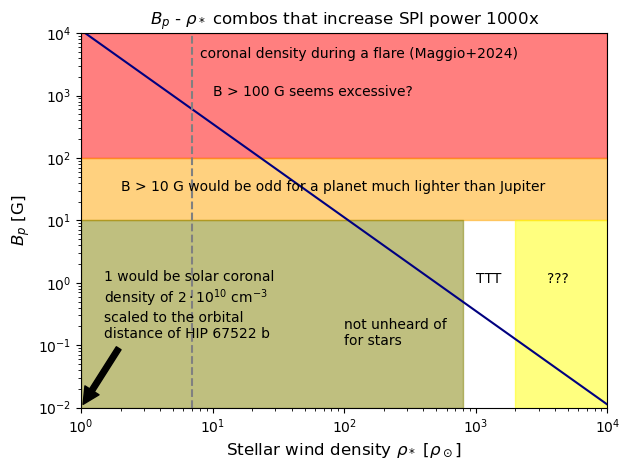

In [13]:
rho_star = np.logspace(0, 4, 100)

Bp = (1000 * rho_star**-1/2)**(3/2)

plt.plot(rho_star, Bp, color="navy")

plt.xscale('log')
plt.yscale('log')

plt.xlabel(r'Stellar wind density $\rho_*$ [$\rho_\odot$]', fontsize=12)
plt.ylabel(r'$B_p$ [G]', fontsize=12)
plt.xlim(rho_star[0], rho_star[-1])
plt.ylim(.01, 1e4)

# fill in a square in the figure above 100 G with olive shading
plt.fill_between(rho_star,  100, 1e4, color='red', alpha=0.5)
plt.text(1e1, 1e3, 'B > 100 G seems excessive?', color='k')
plt.fill_between(rho_star,  10, 100, color='orange', alpha=0.5)
plt.text(2, 30, 'B > 10 G would be odd for a planet much lighter than Jupiter', color='k')

# vertical fill in the region to the right of 100 rho_star with yellow shading
plt.fill_betweenx([.01, 10], 2e3, 1e4, color='yellow', alpha=0.5)
plt.text(3.5e3, 1, '???', color='k')


plt.fill_betweenx([.01, 10], 1, 800, color='olive', alpha=0.5)
plt.text(1e2, .1, 'not unheard of\nfor stars', color='k')

plt.text(1e3, 1, "TTT", c='k')


plt.text(1.5,0.13, '1 would be solar coronal\ndensity of $2\cdot10^{10}$ cm$^{-3}$\nscaled to the orbital\ndistance of HIP 67522 b', color='k')
# arrow pointing to [1,0.01]
plt.annotate('', xy=(1, 0.01), xytext=(2, 0.1), arrowprops=dict(facecolor='black', shrink=0.05))

plt.axvline(7, color='gray', linestyle='--')
plt.text(8, 4e3, 'coronal density during a flare (Maggio+2024)', color='k')

plt.title(r'$B_p$ - $\rho_*$ combos that increase SPI power 1000x')
plt.tight_layout()
plt.savefig('../plots/Bp_vs_rho_star_factor1000.png', dpi=1000)

(170.0, 540.0)

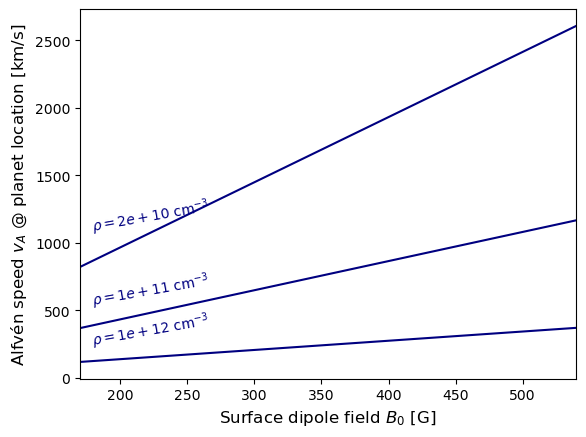

In [48]:
# alfven speed
from astropy.constants import mu0, m_e
import astropy.units as u

def alfven_speed(rho, r_over_a, B0):
    
    

    B = B0 * (r_over_a)**3 bekommt 

    v_A = B / np.sqrt(mu0 * rho)

    return v_A.to(u.km/u.s)

r_over_a = 1/11.7
rho = 2e10 * u.cm**-3 * m_e * r_over_a**2 
B0 = np.linspace(1700*0.5, 2700, 100) * u.G * 0.2

for rho in [2e10, 1e11, 1e12]:
    rhos = rho * u.cm**-3 * m_e * r_over_a**2
    v_A = alfven_speed(rhos, r_over_a, B0)

    plt.plot(B0.value, v_A.value, color='navy')
    plt.text(B0.value[2], v_A.value[0]*1.2 +100, f'$\\rho = {rho:.0e}$ cm$^{{-3}}$', color='navy', rotation=10)

plt.xlabel(r'Surface dipole field $B_0$ [G]', fontsize=12)
plt.ylabel(r'Alfvén speed $v_A$ @ planet location [km/s]', fontsize=12)
# plt.xscale('log')
# plt.yscale('log')
plt.xlim(B0[0].value, B0[-1].value)